# 라이브러리 및 모듈 호출

In [1]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.utils import plot_model

# 데이터 불러오기

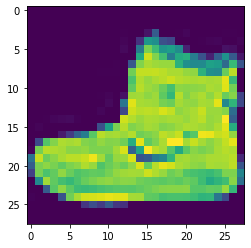

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()\
# 데이터 확인
plt.imshow(x_train[0])

# 이미지 필터 정의

In [3]:
# 가로선을 추출하기 위한 가로선 필터
horizontal_filter = np.array([[1.,2.,1.],
                              [0.,0.,0.],
                              [-1.,-2.,-1.]])
# 세로선을 추출하기 위한 세로선 필터
vertical_filter = np.array([[1.,0.,-1.],
                            [2.,0.,-2.],
                            [1.,0.,-1.]])

# 이미지 리사이즈

In [4]:
test_image = cv2.resize(x_train[0], (27,27))
image_size = test_image.shape[0]
output_size = int((image_size-3)/1+1)
print(f'output의 크기 : {output_size}')

output의 크기 : 25


# 이미지 필터 적용

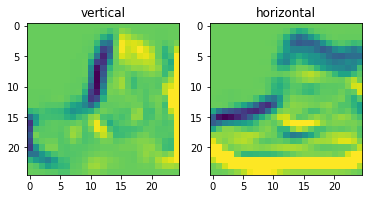

In [5]:
filter_size = 3

def get_filtered_image(filter): # 필터를 이미지에 적용하는 함수 정의
    filtered_image = np.zeros((output_size, output_size)) # 바탕 생성
    for i in range(output_size): # 가로, 세로 모든 픽셀에 대해 반복
        for j in range(output_size):
            indice_image = test_image[i:(i+filter_size),j:(j+filter_size)]*filter # 합성곱 연산
            indice_sum = np.sum(indice_image) # 연산결과값 모두 더함
            if(indice_sum>255):
                indice_sum = 255 # 이미지데이터의 최대값은 255이므로 255를 넘으면 255로 변경
            filtered_image[i,j] = indice_sum
    return filtered_image

# 필터 적용
vertical_filtered_image = get_filtered_image(vertical_filter)
horizontal_filtered_image = get_filtered_image(horizontal_filter)

# 적용한 이미지 시각화
plt.subplot(1,2,1)
plt.title('vertical')
plt.imshow(vertical_filtered_image)

plt.subplot(1,2,2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image)

plt.show()

# 최종 결과 확인

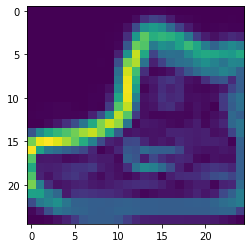

In [6]:
sobel_image = np.sqrt(np.square(horizontal_filtered_image)+np.square(vertical_filtered_image))
plt.imshow(sobel_image)

# 풀링 연산 구현

original image shape : (28,28)
pooled image shape : (14,14)


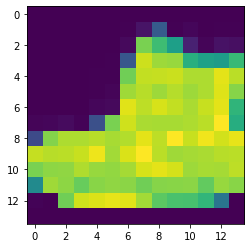

In [7]:
image = x_train[0]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x/2)
new_image_y = int(image_y/2)

pooled_image = np.zeros((new_image_x,new_image_y))

print(f'original image shape : ({image_x},{image_y})')
print(f'pooled image shape : ({new_image_x},{new_image_y})')

for x in range(0, image_x, 2):
    for y in range(0, image_y,2):
        pooled_image[int(x/2), int(y/2)] = np.max(image[x:x+2,y:y+2])
plt.imshow(pooled_image)

# 결국 strides=2, pool_size=2인 맥스풀링

In [8]:
# 모델 구성 및 구조 확인하기
model = Sequential()
model.add(Conv2D(filters=16, 
                 kernel_size=3, 
                 strides=(1, 1), 
                 padding='same', 
                 activation='relu',
                 input_shape=(28, 28, 1))) # 첫 층은 무조건 입력값 사이즈 필요
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0